In [14]:
# from https://data36.com/plot-histogram-python-pandas/

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import csv

ctf_dump_file = "irmin-mem.ctf.dump"

In [15]:
# maintain a dict, mapping allocation size to number of allocs
allocs = dict()

# and a simple list of alloc sizes
xs = []

with open(ctf_dump_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        #print(', '.join(row))
        entry_type = row[0]
        if (entry_type == 'a' or entry_type == 'A'):
            sz = int(row[2])
            xs.append(int(sz))
            if sz in allocs:
                allocs[sz] = allocs[sz]+1
            else:
                allocs[sz] = 1

#print(allocs)
#print(xs)

In [16]:
#allocs.keys()
#allocs.values()
ys = np.array(list(allocs.items()))
ys

array([[     3, 352830],
       [     4, 693736],
       [    42,      4],
       [     6,  84726],
       [     5, 736888],
       [    50,      2],
       [     2, 948777],
       [    65, 130343],
       [    30,      9],
       [    22,      7],
       [     8,  83011],
       [     7, 113924],
       [     1, 429172],
       [    28, 115602],
       [  8202,     32],
       [   129,     20],
       [  8193,   2452],
       [    12,      8],
       [    16,  16952],
       [    57,      7],
       [    20,     15],
       [    13,  55771],
       [    11,  60330],
       [    10,  32882],
       [    19,      1],
       [    17,      1],
       [     9,  40206],
       [    14,  15016],
       [    15,     28],
       [  1345,    167],
       [  1010,      1],
       [   930,      3],
       [   932,      1],
       [   929,      1],
       [   923,     63],
       [   922,     64],
       [  1024,     36],
       [ 10753,      1],
       [  9676,      1],
       [  2689,      2],


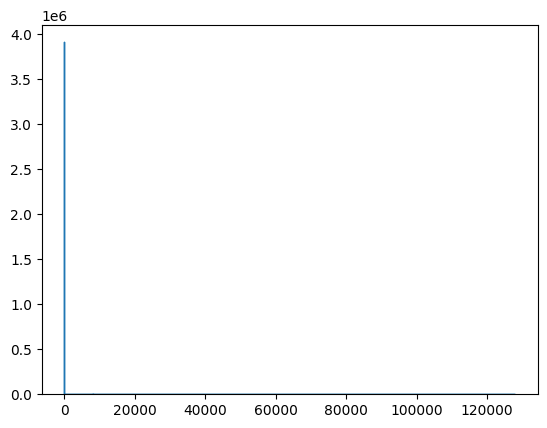

In [17]:
x = xs
counts, bins = np.histogram(x,1000)
plt.stairs(counts,bins)

In [18]:
counts

array([3910256,      20,       2,       0,       1,       0,       0,
           171,       2,       1,     168,       0,       0,       0,
             0,       0,       2,       0,       0,       0,       0,
             2,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,    2484,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       1,       0,
             0,       0,       0,       0,       0,       0,       0,
             1,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,     

In [19]:
bins

array([1.00000e+00, 1.29000e+02, 2.57000e+02, ..., 1.27745e+05,
       1.27873e+05, 1.28001e+05])

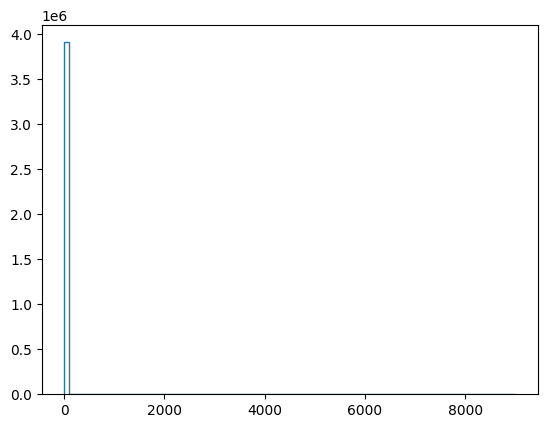

In [20]:
counts, bins = np.histogram(x,range=(0,100),bins=100)
plt.stairs(counts,bins)

The above graph is for the x range 0..100; there are several very large allocs that we want to ignore (otherwise the histogram bars are too coarse and the histogram doesn't really tell us much). 

It may make sense to consider something like 1023 (or even 127) as the max "small" alloc, and compute the ratio of small to large allocs (in order to get a single yes/no indicator of whether there are a significant number of large allocs). This is what we calculate next.

In [21]:
# sum allocs.items; split into "small" vs "large" allocs
def compute_ratio_small_large(max_small_sz,allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    def is_small(sz): return sz <= max_small_sz
    total_small_allocs = sum([ v for (k,v) in allocs.items() if is_small(k) ])
    total_large_allocs = sum([ v for (k,v) in allocs.items() if not is_small(k) ])
    percentage_large = 100.0 * total_large_allocs / (total_small_allocs+total_large_allocs)
    total = total_small_allocs+total_large_allocs
    return { "total_small_allocs":total_small_allocs,
            "total_large_allocs": total_large_allocs,
            "total":total,
           "percentage_large": percentage_large}

x = compute_ratio_small_large(127,allocs)

print("Percentage large allocs of total: ", x["percentage_large"] , "(total is "+str(x["total"])+")")

# for max_small_sz = 127, this gives ~ 0.07% of allocs are "large", size >= 128 bytes

Percentage large allocs of total:  0.07311307073108216 (total is 3913117)
